      Date            Open              High             Low         
 1/10/00:    1   Min.   :  52.20   Min.   :  52.2   Min.   :  51.35  
 1/10/01:    1   1st Qu.:  99.95   1st Qu.: 100.7   1st Qu.:  99.16  
 1/10/02:    1   Median : 317.31   Median : 319.3   Median : 315.26  
 1/10/03:    1   Mean   : 646.09   Mean   : 650.0   Mean   : 642.01  
 1/10/05:    1   3rd Qu.:1157.51   3rd Qu.:1166.4   3rd Qu.:1147.99  
 1/10/06:    1   Max.   :2867.23   Max.   :2872.9   Max.   :2851.48  
 (Other):14676                                                       
     Close             Volume            Adj.Close      
 Min.   :  52.20   Min.   :1.890e+06   Min.   :  52.20  
 1st Qu.:  99.95   1st Qu.:1.780e+07   1st Qu.:  99.95  
 Median : 317.52   Median :1.647e+08   Median : 317.52  
 Mean   : 646.24   Mean   :1.062e+09   Mean   : 646.24  
 3rd Qu.:1157.98   3rd Qu.:1.488e+09   3rd Qu.:1157.98  
 Max.   :2872.87   Max.   :1.146e+10   Max.   :2872.87  
                                         

[1] "Date"      "Open"      "High"      "Low"       "Close"     "Volume"   
[7] "Adj.Close"

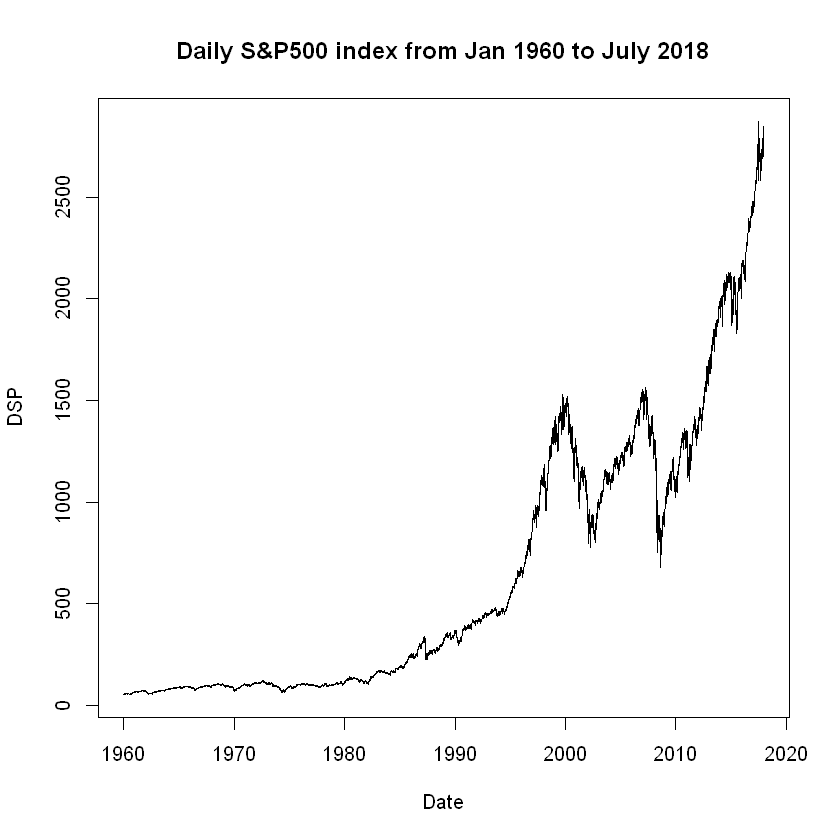

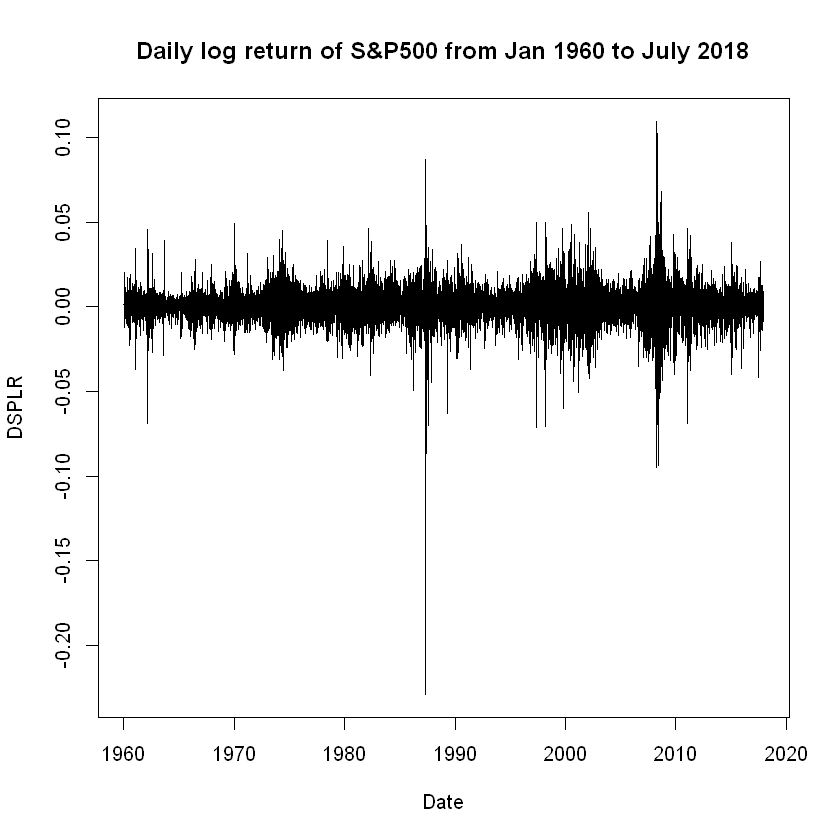

Warning message in file(file, "rt"):
"cannot open file 'Citi_13Jan.txt': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


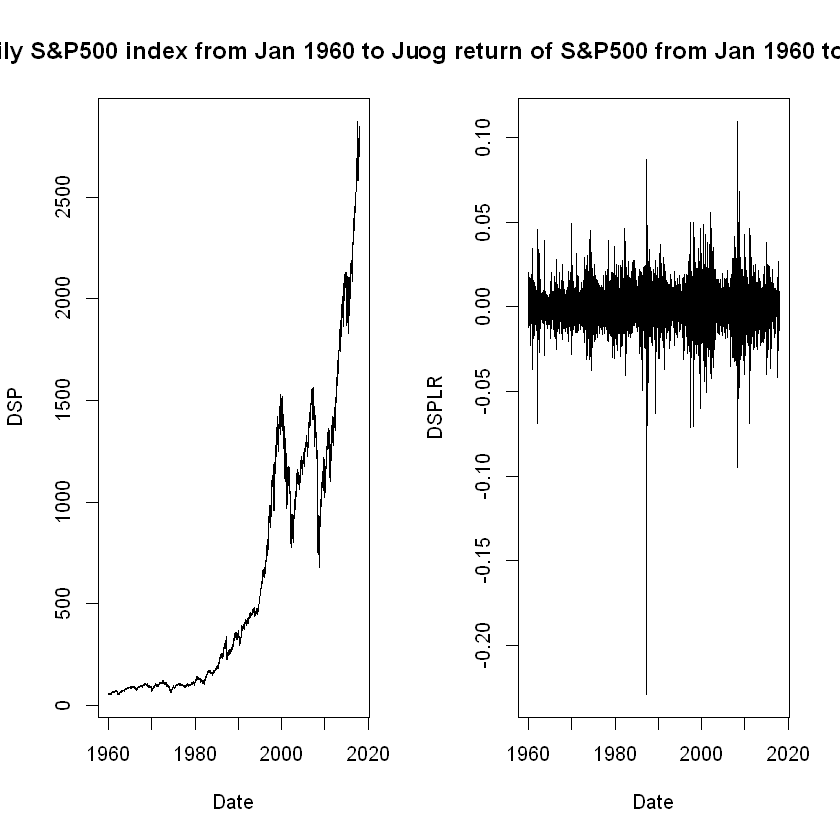

In [1]:
rm(list = ls())
setwd("...")  # set directory


SP500 <- read.table("DSP500.csv",header = T, sep=",")

attach(SP500)
summary(SP500)
names(SP500)

DSP<-rev(SP500$Close)

DSP_time<- seq(from=1960,to=2018,length.out=length(DSP)) 

plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")

DSPLR <- diff(log(DSP))  # compute log returns; 
                         # try help(diff) for the usage of diff

plot(DSP_time[2:length(DSP)], DSPLR,type="l",xlab="Date",main="Daily log return of S&P500 from Jan 1960 to July 2018")

par(mfrow=c(1,2))  
# divide the plotting area into 1 by 2 to facilitate comparison 
plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")
plot(DSP_time[1:length(DSPLR)], DSPLR,type="l",xlab="Date",main="Daily log return of S&P500 from Jan 1960 to July 2018")

qqnorm(DSPLR, main="Normal QQ plot of DSLPR")

###################
Citi<-read.table("Citi_13Jan.txt",head=T)
attach(Citi)
head(Citi)

price <- as.numeric(as.character(PRICE))
t<-as.character(TIME)
t<-strptime(t,"%H:%M:%S")

summary(t)
summary(price)

plot(t,price,type="l",xlab="Time",main="Price of Citi on Jan 2, 2013")


par(mfrow=c(1,2))
plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")
plot(t,price,type="l",xlab="Time",main="Price of Citi on Jan 2, 2013")


# next compute minute-by-minute returns
Dt<-60 #every 6 sec

tn<-as.numeric(difftime(t,t[1],units="secs")) #t numeric, tn[1]=0
b<-floor(tn/Dt)
FirstPerDt<- b - c(-1,b[-length(b)]) #nonzero entries are the first ones per Dt

price_60sec <- price[FirstPerDt != 0]
tn1_60sec<-tn[FirstPerDt != 0]

Citi_LR60sec <- diff(log(price_60sec))  # compute log returns; 

plot(tn1_60sec[-1], Citi_LR60sec,type="l",xlab="Time",main="Intraday minute-by-minute returns of Citi on Jan 2, 2013")

par(mfrow=c(1,1))  
hist(Citi_LR60sec[Citi_LR60sec < 0.004], freq = F, main="Histogram of Citi minute-by-minute returns")  

qqnorm(Citi_LR60sec[Citi_LR60sec < 0.004], main="Normal QQ plot of Citi minute-by-minute returns")

hist(DSPLR, breaks = 50, freq = F, main="Histogram of DSPLR")   


################# Coffee data
library(Rsafd)

data(BCofLRet)
data(CCofLRet)

CofLR <- cbind(BCofLRet,CCofLRet)

summary(BCofLRet)
summary(CCofLRet)

plot(BCofLRet,CCofLRet)

##### BH vs SP
BH_SP <- read.table("SP_BH.CSV",head=T, sep=",")
attach(BH_SP)
head(BH_SP)
SP <- BH_SP$SP
BH <- BH_SP$BH

SP_rtn <- diff(log(SP))
BH_rtn <- diff(log(BH))

par(mfrow=c(1,1))
plot(SP, BH,main="BH price vs SP500 index")
plot(SP_rtn, BH_rtn,main="BH return vs SP500 return")


      Date            Open              High             Low         
 1/10/00:    1   Min.   :  52.20   Min.   :  52.2   Min.   :  51.35  
 1/10/01:    1   1st Qu.:  99.95   1st Qu.: 100.7   1st Qu.:  99.16  
 1/10/02:    1   Median : 317.31   Median : 319.3   Median : 315.26  
 1/10/03:    1   Mean   : 646.09   Mean   : 650.0   Mean   : 642.01  
 1/10/05:    1   3rd Qu.:1157.51   3rd Qu.:1166.4   3rd Qu.:1147.99  
 1/10/06:    1   Max.   :2867.23   Max.   :2872.9   Max.   :2851.48  
 (Other):14676                                                       
     Close             Volume            Adj.Close      
 Min.   :  52.20   Min.   :1.890e+06   Min.   :  52.20  
 1st Qu.:  99.95   1st Qu.:1.780e+07   1st Qu.:  99.95  
 Median : 317.52   Median :1.647e+08   Median : 317.52  
 Mean   : 646.24   Mean   :1.062e+09   Mean   : 646.24  
 3rd Qu.:1157.98   3rd Qu.:1.488e+09   3rd Qu.:1157.98  
 Max.   :2872.87   Max.   :1.146e+10   Max.   :2872.87  
                                         

[1] "Date"      "Open"      "High"      "Low"       "Close"     "Volume"   
[7] "Adj.Close"

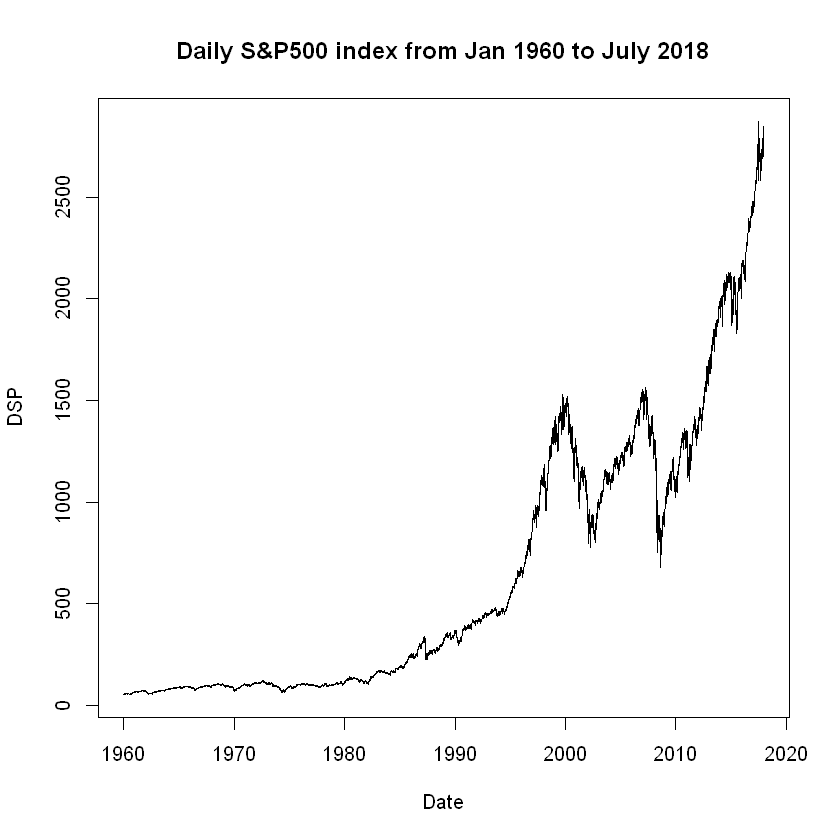

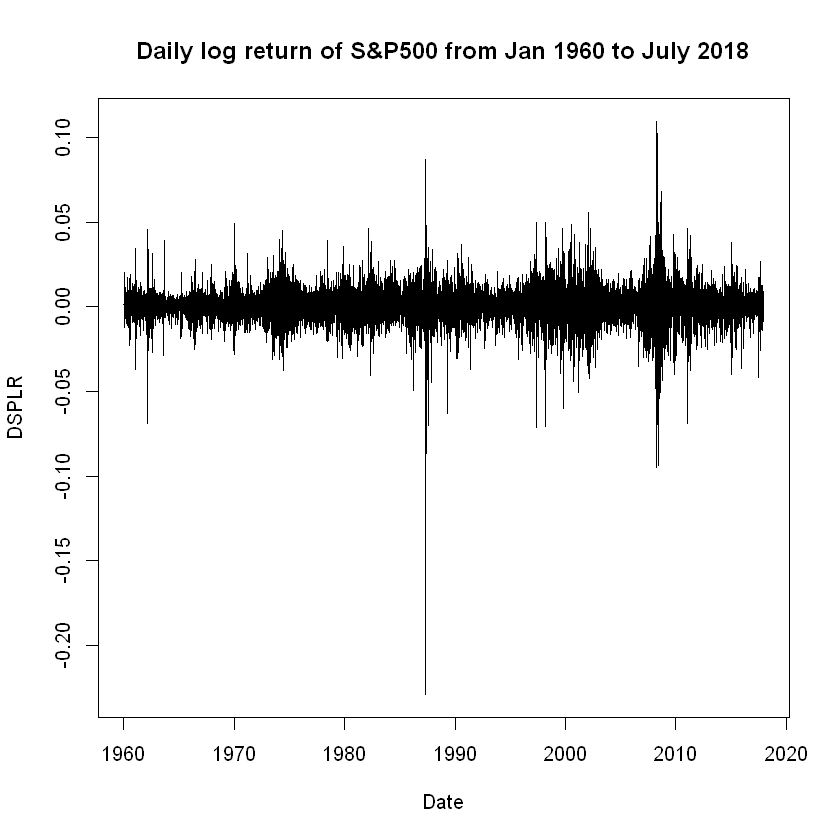

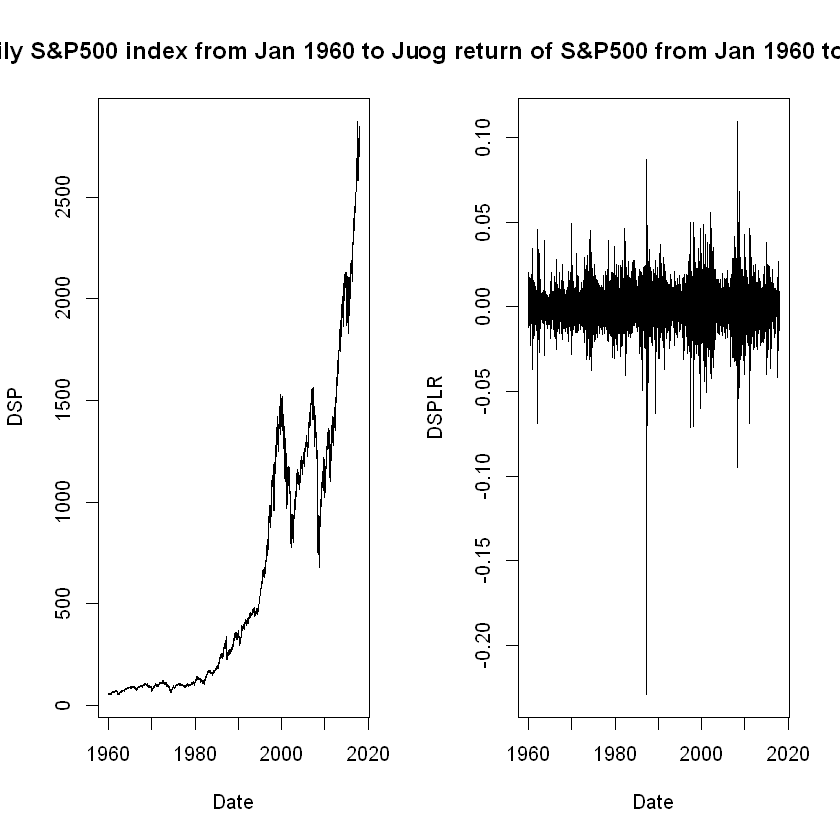

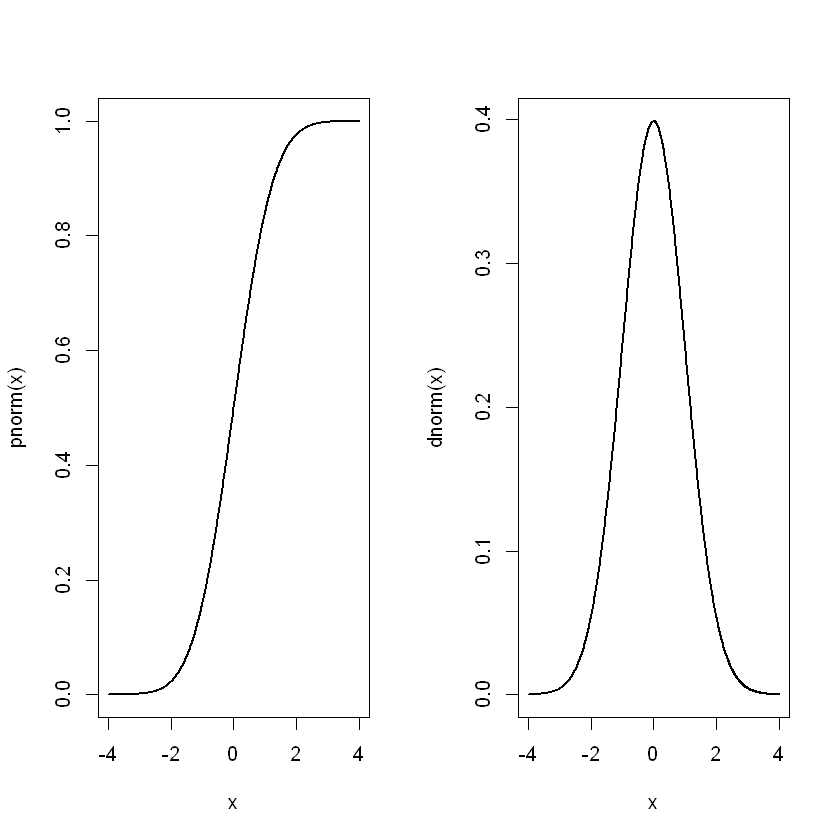

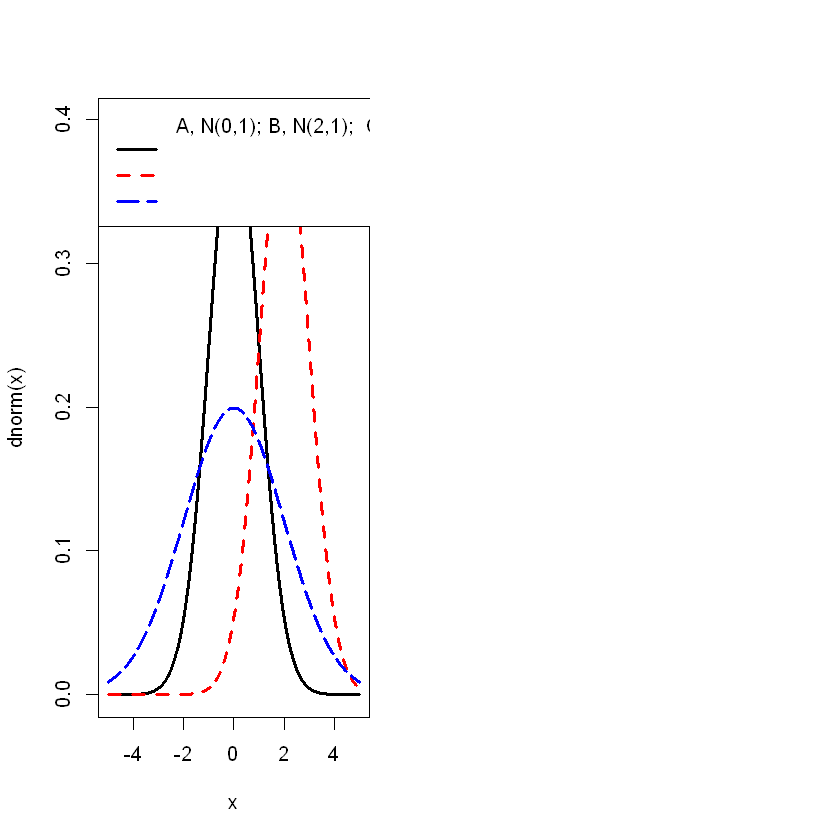

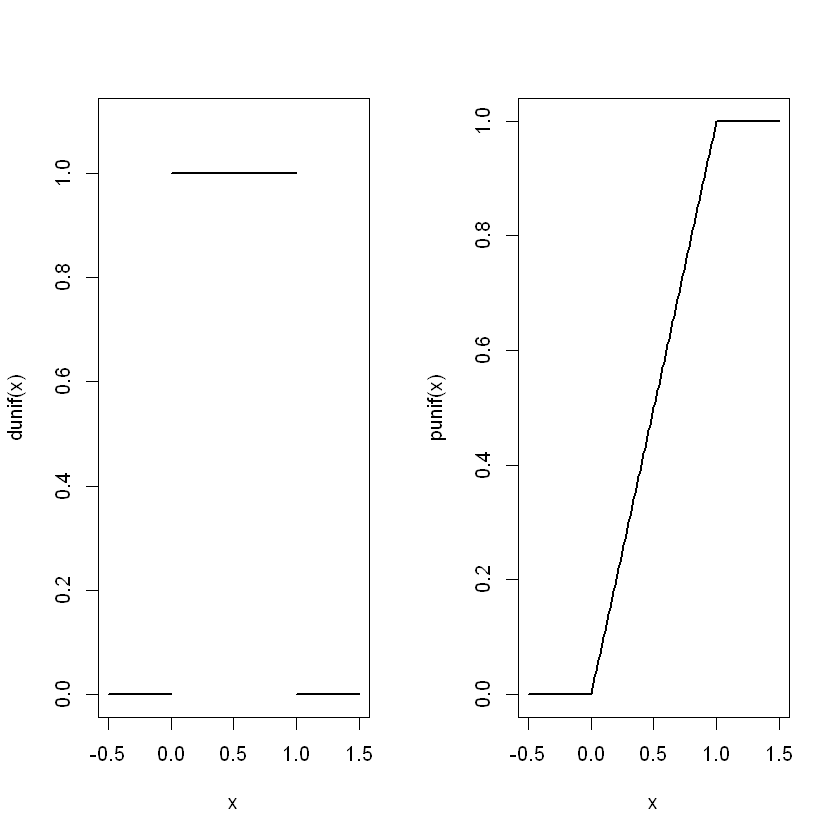

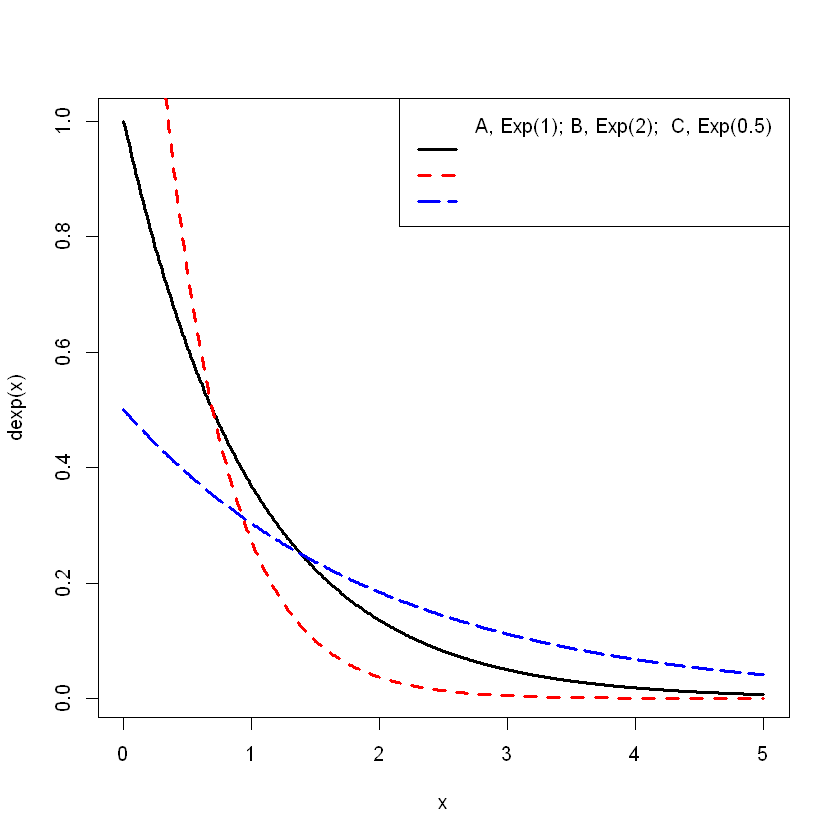

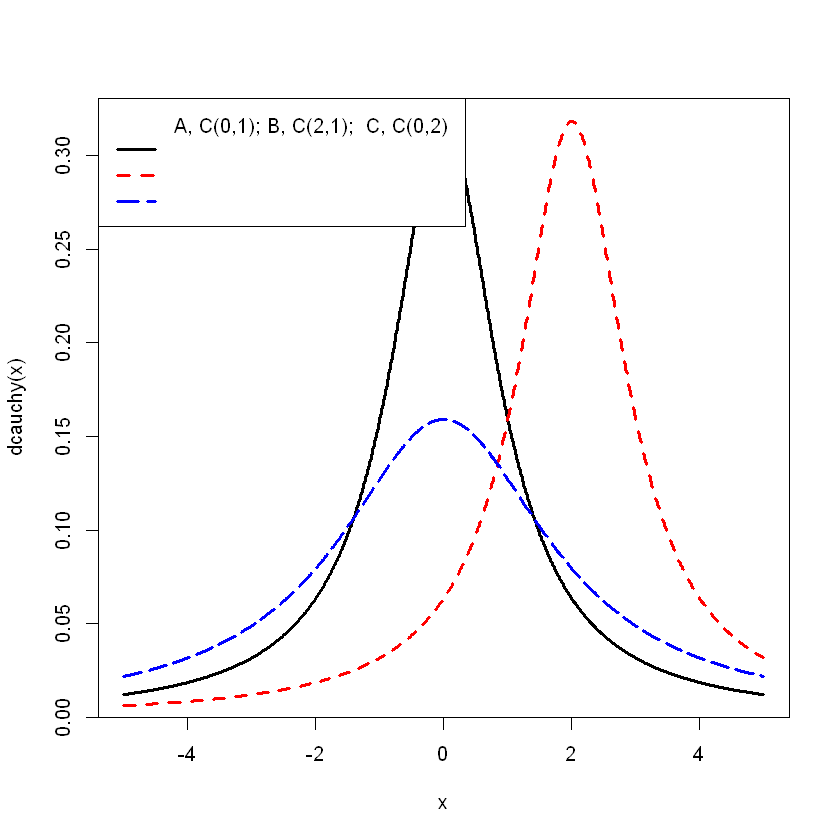

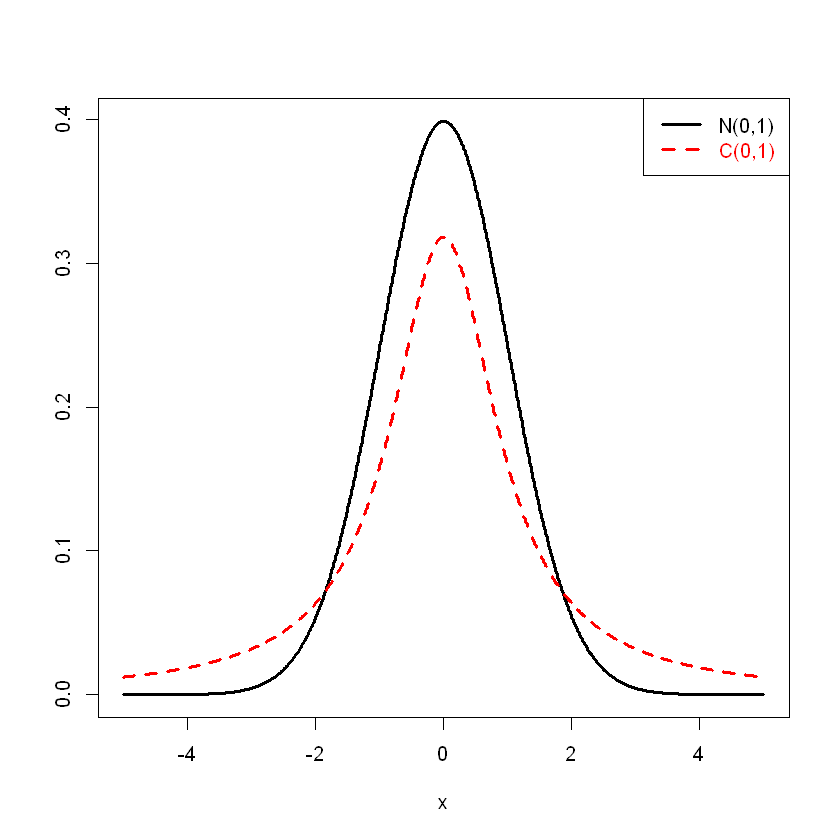

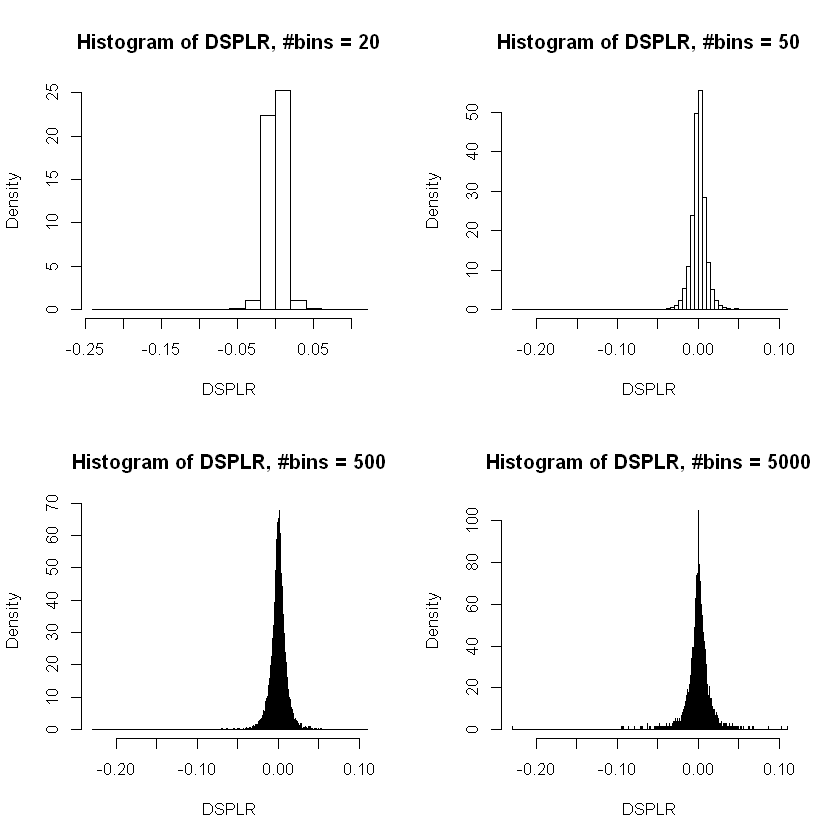

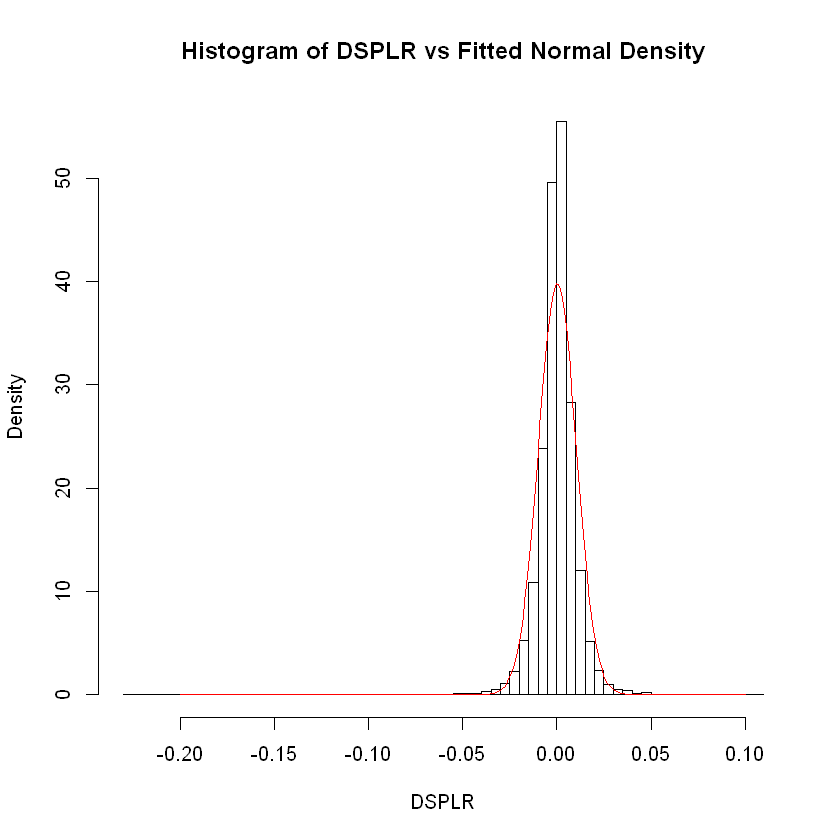

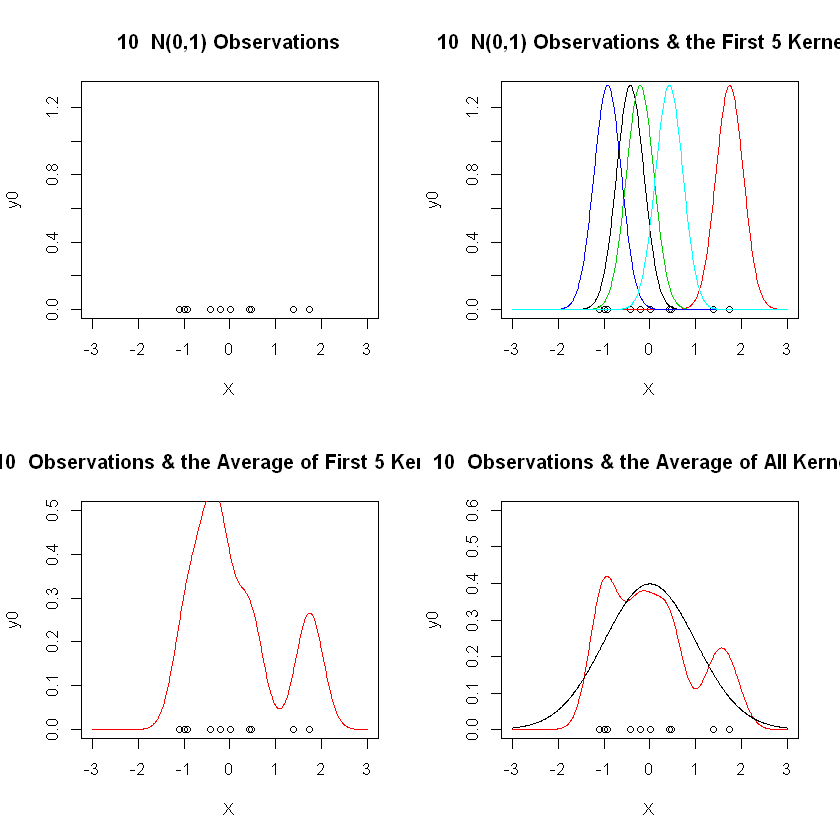

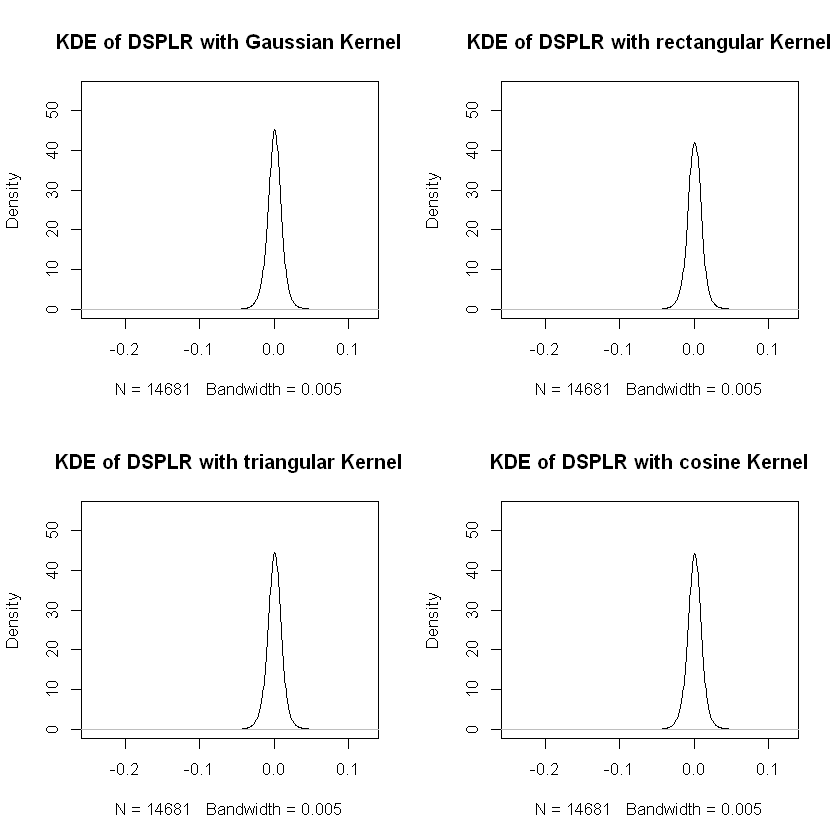

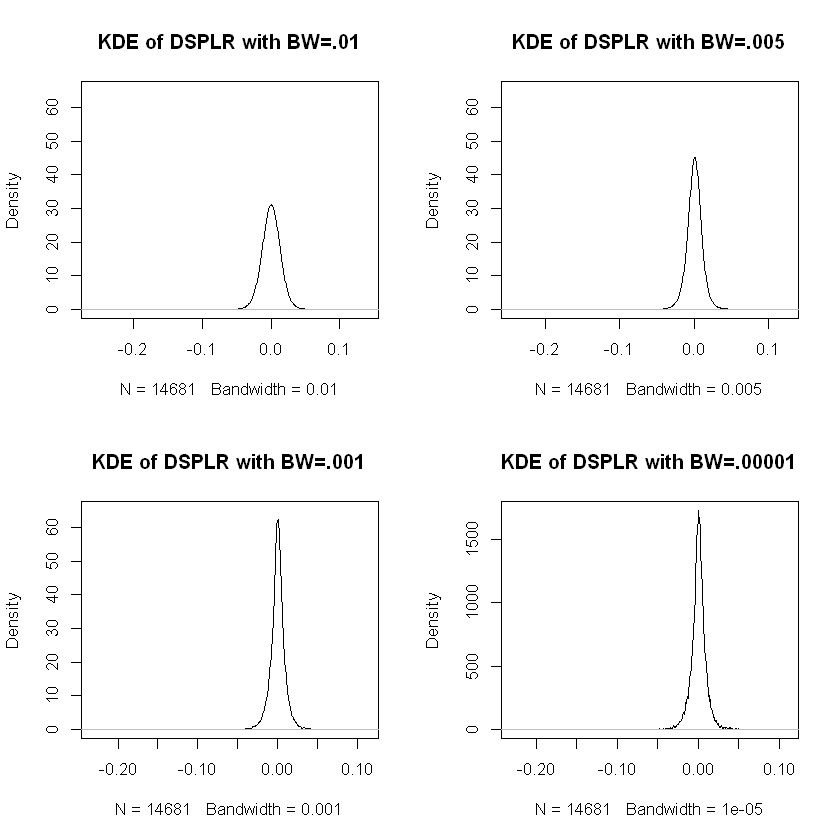


Call:
	density.default(x = DSPLR, kernel = "gaussian")

Data: DSPLR (14681 obs.);	Bandwidth 'bw' = 0.000909

       x                  y           
 Min.   :-0.23172   Min.   : 0.00000  
 1st Qu.:-0.14572   1st Qu.: 0.00000  
 Median :-0.05971   Median : 0.00367  
 Mean   :-0.05971   Mean   : 2.90438  
 3rd Qu.: 0.02629   3rd Qu.: 0.16330  
 Max.   : 0.11230   Max.   :62.45821  

[1] "x"         "y"         "bw"        "n"         "call"      "data.name"
[7] "has.na"

[1] 0.0009090021

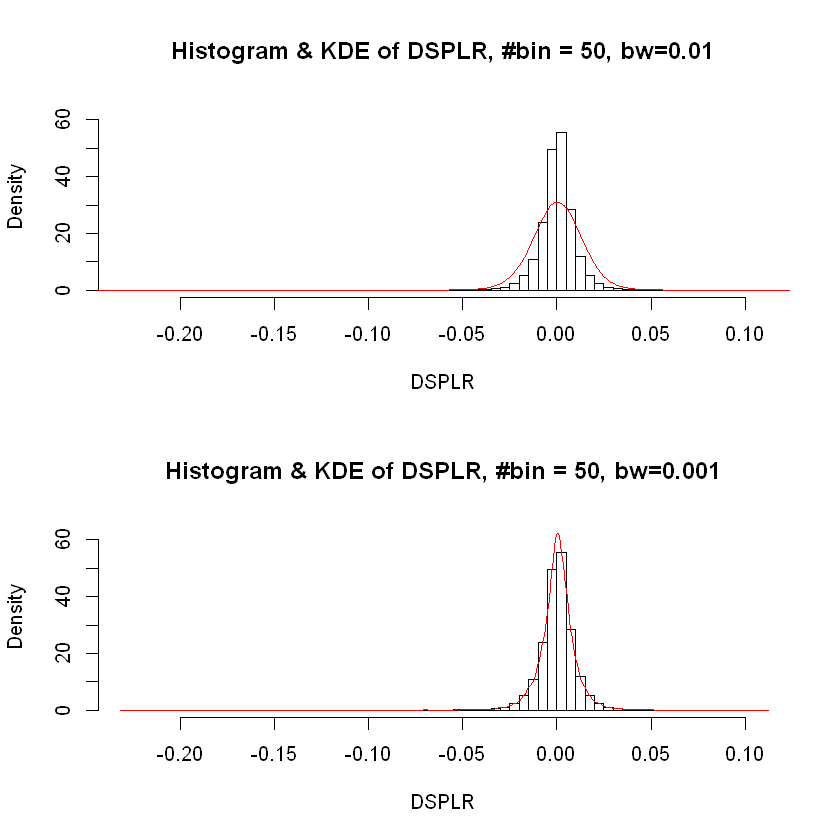

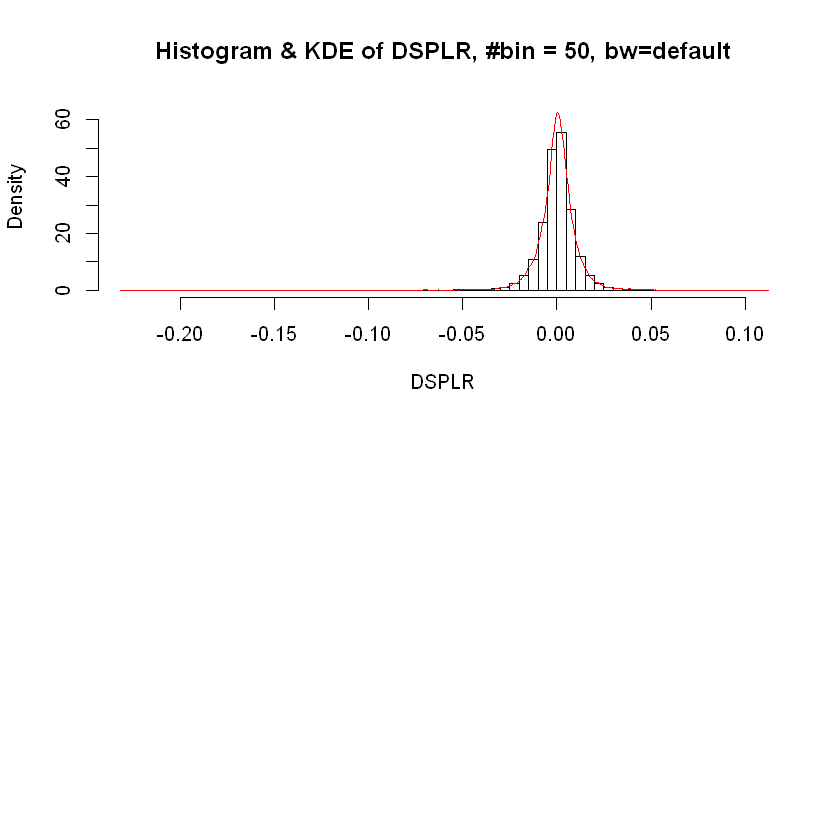

In [1]:
rm(list = ls())
setwd("...")  # set directory


SP500 <- read.table("DSP500.csv",header = T, sep=",")

attach(SP500)
summary(SP500)
names(SP500)

DSP<-rev(SP500$Close)
                                      
DSP_time<- seq(from=1960,to=2018,length.out=length(DSP)) 

plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")

DSPLR <- diff(log(DSP))  # compute log returns; 
                         # try help(diff) for the usage of diff

plot(DSP_time[2:length(DSP)], DSPLR,type="l",xlab="Date",main="Daily log return of S&P500 from Jan 1960 to July 2018")

par(mfrow=c(1,2))  
# divide the plotting area into 1 by 2 to facilitate comparison 
plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")
plot(DSP_time[1:length(DSPLR)], DSPLR,type="l",xlab="Date",main="Daily log return of S&P500 from Jan 1960 to July 2018")


##### common distributions

# normal
x<-seq(-4,4,by=0.01)
plot(x,pnorm(x),type="l",lwd=2 )

plot(x,dnorm(x),type="l",lwd=2 )

x<-seq(-5,5,by=0.01)
plot(x,dnorm(x),type="l",lwd=3)
lines(x,dnorm(x,mean=2),lty=2,lwd=3,col="red")
lines(x,dnorm(x,mean=0,sd=2),lty=5,lwd=3,col="blue")
legend("topleft", c("A, N(0,1); B, N(2,1);  C, N(0,4)", "", "",""),lty=c(0,1,2,5),lwd=c(3,3,3,3),col=c("black","black","red","blue"),
	text.col=c("black","black","red","blue"))


# uniform
x<-seq(-0.5,1.5,by=0.01)
par(mfrow=c(1,2))
plot(c(0,1),c(1,1),xlim=c(-0.5,1.5),ylim=c(0,1.1),type="l",lwd=2,ylab="dunif(x)",xlab="x")
lines(c(-0.5,0),c(0,0),lwd=2)
lines(c(1,1.5),c(0,0),lwd=2)

plot(x,punif(x),type="l",lwd=2)

# exponential
x<-seq(0,5,by=0.01)
par(mfrow=c(1,1))
plot(x,dexp(x),type="l",lwd=3)
lines(x,dexp(x,rate=2),lty=2,lwd=3,col="red")
lines(x,dexp(x,rate=0.5),lty=5,lwd=3,col="blue")
legend("topright", c("A, Exp(1); B, Exp(2);  C, Exp(0.5)", "", "",""),lty=c(0,1,2,5),lwd=c(3,3,3,3),col=c("black","black","red","blue"),
	text.col=c("black","black","red","blue"))

# Cauchy
x<-seq(-5,5,by=0.01)
plot(x,dcauchy(x),type="l",lwd=3)
lines(x,dcauchy(x,location=2),lty=2,lwd=3,col="red")
lines(x,dcauchy(x,scale=2),lty=5,lwd=3,col="blue")
legend("topleft", c("A, C(0,1); B, C(2,1);  C, C(0,2)", "", "",""),lty=c(0,1,2,5),lwd=c(3,3,3,3),col=c("black","black","red","blue"),
	text.col=c("black","black","red","blue"))

# Normal vs Cauchy
x<-seq(-5,5,by=0.01)
plot(x,dnorm(x),type="l",lwd=3,ylab="")
lines(x,dcauchy(x),lty=2,lwd=3,col="red")
legend("topright", c("N(0,1)","C(0,1)"),lty=c(1,2),lwd=c(3,3),col=c("black","red"),text.col=c("black","red"))


################# 

# histogram
par(mfrow=c(2,2))  # to divide the plotting area into 2 by 2  
hist(DSPLR, breaks = 20, freq = F, main="Histogram of DSPLR, #bins = 20")   
   # try help(hist) to learn its options
hist(DSPLR, breaks=50, freq = F,main="Histogram of DSPLR, #bins = 50") 
hist(DSPLR,breaks=500,  freq = F,main="Histogram of DSPLR, #bins = 500")   
hist(DSPLR,breaks=5000, freq = F,main="Histogram of DSPLR, #bins = 5000")

# histogram
par(mfrow=c(1,1)) 
hist(DSPLR,breaks=100,  freq = F,main="Histogram of DSPLR vs Fitted Normal Density")   

mu_DSPLR <- mean(DSPLR)
sd_DSPLR <- sd(DSPLR)

x<-seq(-0.2,0.1,by=0.001)
y<-dnorm(x,mean=mu_DSPLR,sd = sd_DSPLR)
points(x,y,type="l",col="red")


# kernel density
## KDE illustration
n<-10
X<-rnorm(n)
y0<-rep(0,n)

bw <- 0.3

par(mfrow = c(2,2))
plot(X,y0, xlim=c(-3,3), ylim=c(0,1.3), main = paste(bquote(.(n)), " N(0,1) Observations"))

plot(X,y0, xlim=c(-3,3), ylim=c(0,1.3), main = paste(bquote(.(n)), " N(0,1) Observations & the First 5 Kernels"))
x<-seq( - 3,  + 3, by = 0.01)
for (i in 1:5)
{
 KD <- dnorm(x, X[i], bw) 
 points(x, KD, type="l", col = i)
}

plot(X,y0, xlim=c(-3,3), ylim=c(0,0.5), main = paste(bquote(.(n)), " Observations & the Average of First 5 Kernels"))
KD<- rep(0,601)
for (i in 1:5)
{
 KD <- KD + dnorm(x, X[i], bw) 
}
KD <- KD/5
points(x, KD, type="l", col = "red")


plot(X,y0, xlim=c(-3,3), ylim=c(0,0.6), main = paste(bquote(.(n)), " Observations & the Average of All Kernels"))
KD<- rep(0,601)
for (i in 1:n)
{
 KD <- KD + dnorm(x, X[i], bw) 
}
KD <- KD/n
points(x, KD, type="l", col = "red")

# superimpose the N(0,1) density
y1<-dnorm(x)
points(x, y1, type="l", col = "black")


# different kernel
par(mfrow=c(2,2))
KD5 <- density(DSPLR, kernel = "gaussian", bw = .005) 
plot(KD5, type="l",ylim=c(0,55), main="KDE of DSPLR with Gaussian Kernel")
KD6 <- density(DSPLR, kernel = "rectangular", bw = .005) 
plot(KD6, type="l",ylim=c(0,55), main="KDE of DSPLR with rectangular Kernel")
KD7 <- density(DSPLR, kernel = "triangular", bw = .005) 
plot(KD7, type="l",ylim=c(0,55), main="KDE of DSPLR with triangular Kernel")
KD8 <- density(DSPLR, kernel = "cosine", bw = .005) 
plot(KD8, type="l", ylim=c(0,55),main="KDE of DSPLR with cosine Kernel")


# different bandwidth
par(mfrow=c(2,2))
KD1 <- density(DSPLR, kernel = "gaussian", bw = .01) 
plot(KD1, type="l",ylim=c(0,65), main="KDE of DSPLR with BW=.01")
KD2 <- density(DSPLR, kernel = "gaussian", bw = .005) 
plot(KD2, type="l",ylim=c(0,65), main="KDE of DSPLR with BW=.005")
KD3 <- density(DSPLR, kernel = "gaussian", bw = .001) 
plot(KD3, type="l",ylim=c(0,65), main="KDE of DSPLR with BW=.001")
KD4 <- density(DSPLR, kernel = "gaussian", bw = .00001) 
plot(KD4, type="l", main="KDE of DSPLR with BW=.00001")



# histogram and Kernel
par(mfrow=c(2,1))
hist(DSPLR,breaks=50,  freq = F,main="Histogram & KDE of DSPLR, #bin = 50, bw=0.01",ylim=c(0,65))   
KD4 <- density(DSPLR, kernel = "gaussian", bw = .01) 
points(KD4,type="l",col="red")

KD9 <- density(DSPLR, kernel = "gaussian", bw = .001) 
hist(DSPLR,breaks=50,  freq = F,main="Histogram & KDE of DSPLR, #bin = 50, bw=0.001",ylim=c(0,65))   
points(KD9,type="l",col="red")


# default choice of bw
KD0 <- density(DSPLR, kernel = "gaussian") 
hist(DSPLR,breaks=50,  freq = F,main="Histogram & KDE of DSPLR, #bin = 50, bw=default",ylim=c(0,65))   
points(KD0,type="l", col="red")


KD0
names(KD0)
KD0$bw


q,0.010,0.025,0.050,0.100,0.150,0.250,0.500,0.750,0.850,0.900,0.950,0.975,0.990
q_norm,-2.326,-1.960,-1.645,-1.282,-1.036,-0.674,0.000,0.674,1.036,1.282,1.645,1.960,2.326
q_cauchy,-31.821,-12.706,-6.314,-3.078,-1.963,-1.000,0.000,1.000,1.963,3.078,6.314,12.706,31.821
q_exp,0.010,0.025,0.051,0.105,0.163,0.288,0.693,1.386,1.897,2.303,2.996,3.689,4.605


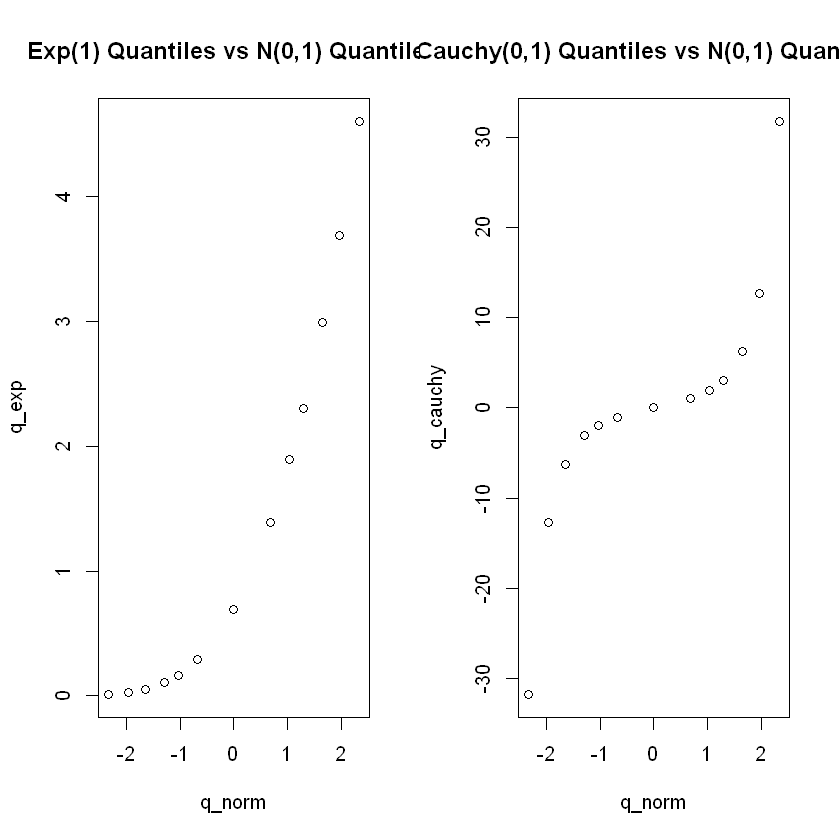

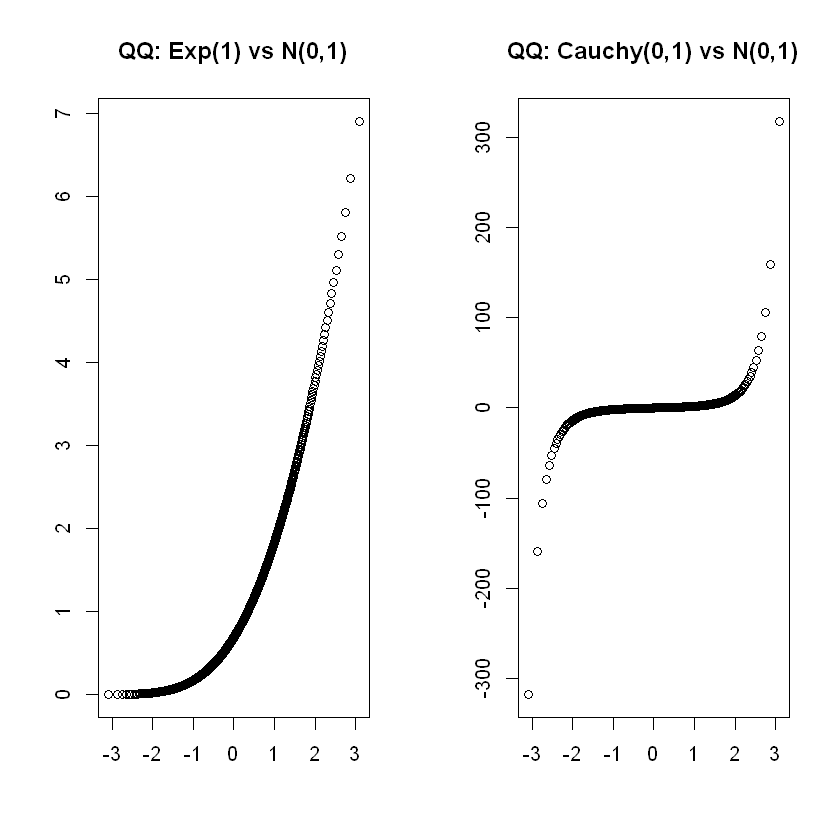

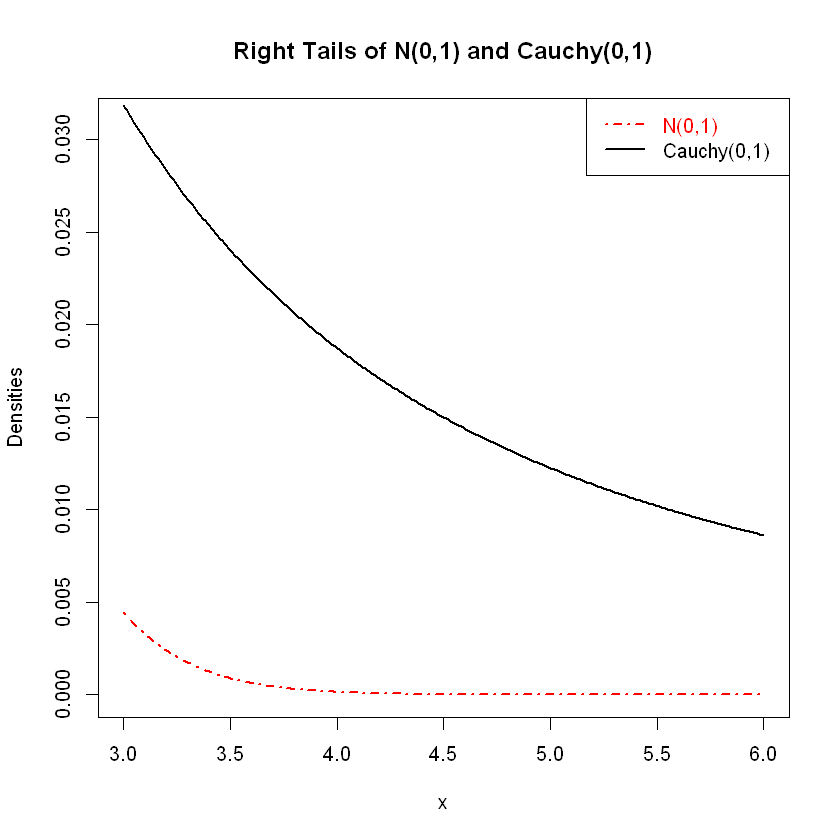

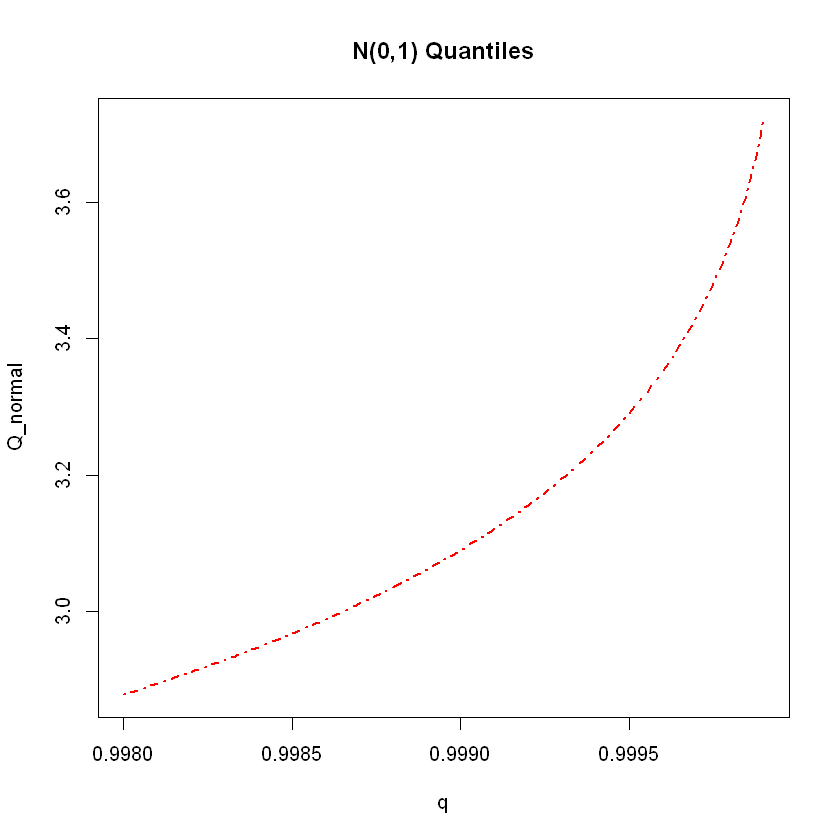

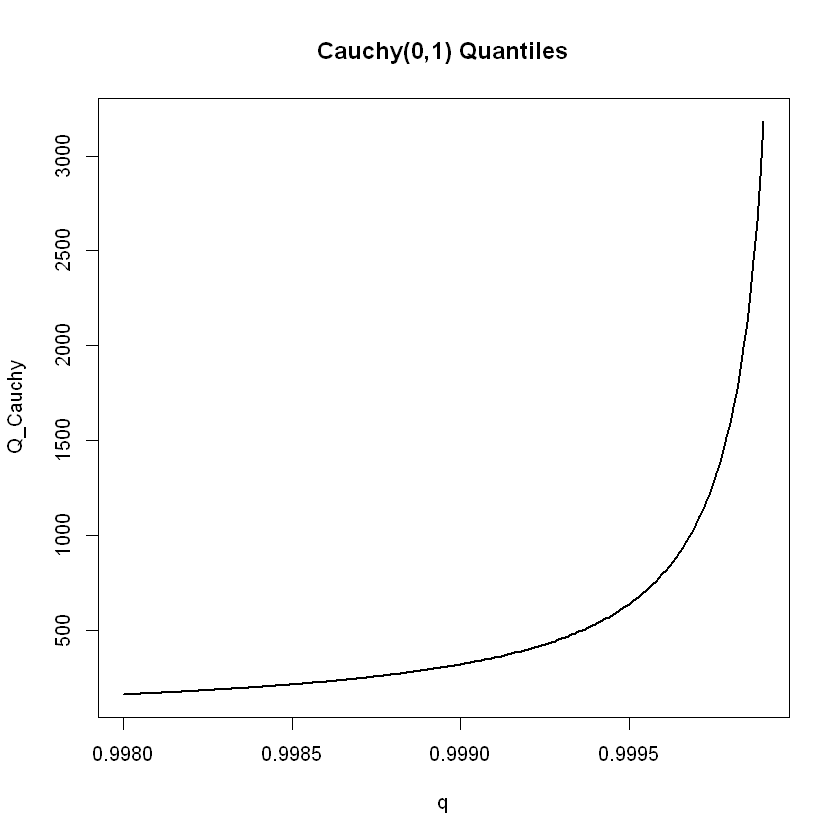

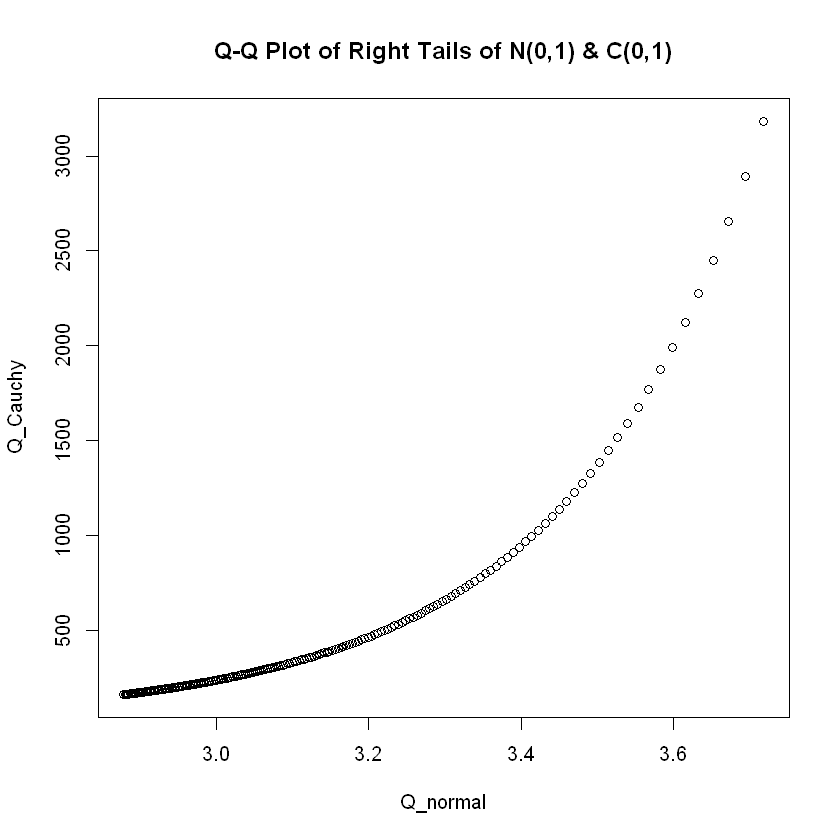

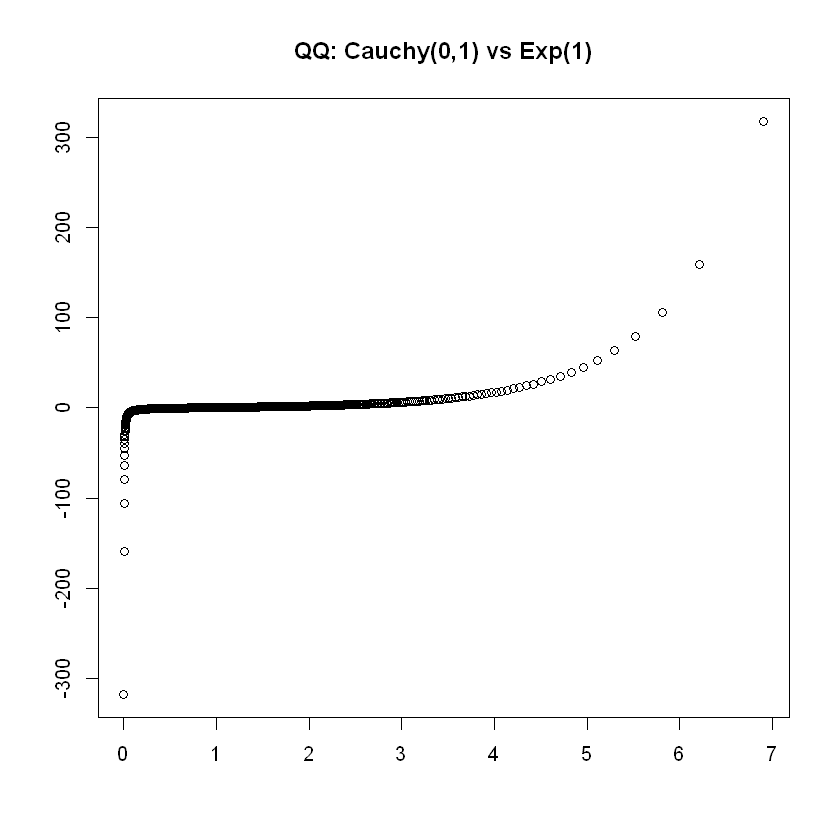

[1] -2.0005194 -1.8397203 -1.6004335 -1.1797435 -1.0575769 -0.3769609
 [7] -0.2435284 -0.2265455 -0.1173979  0.3072537

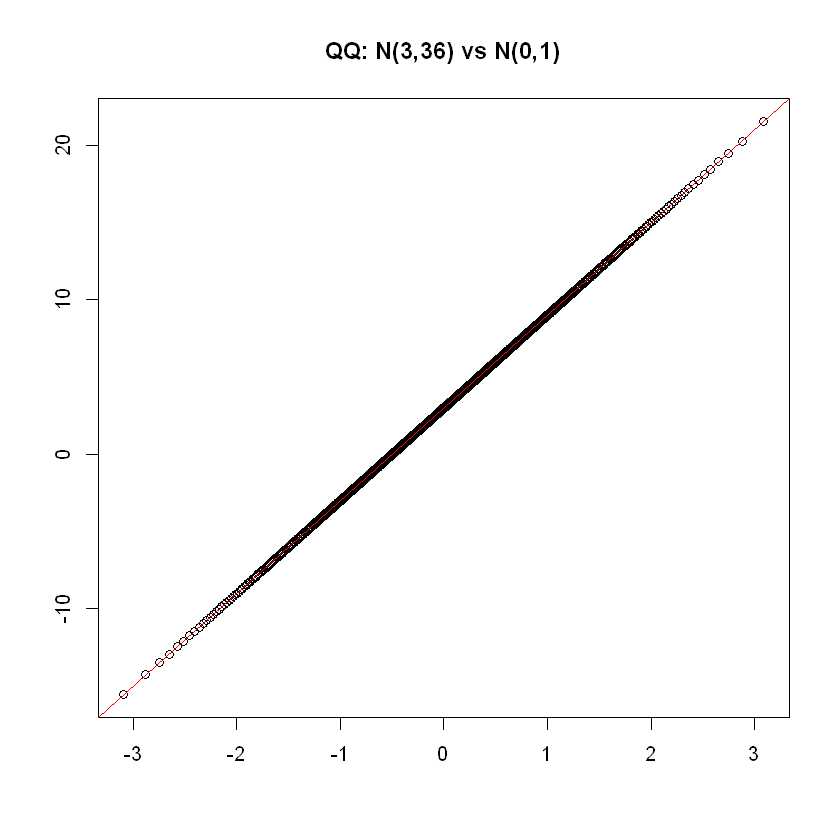

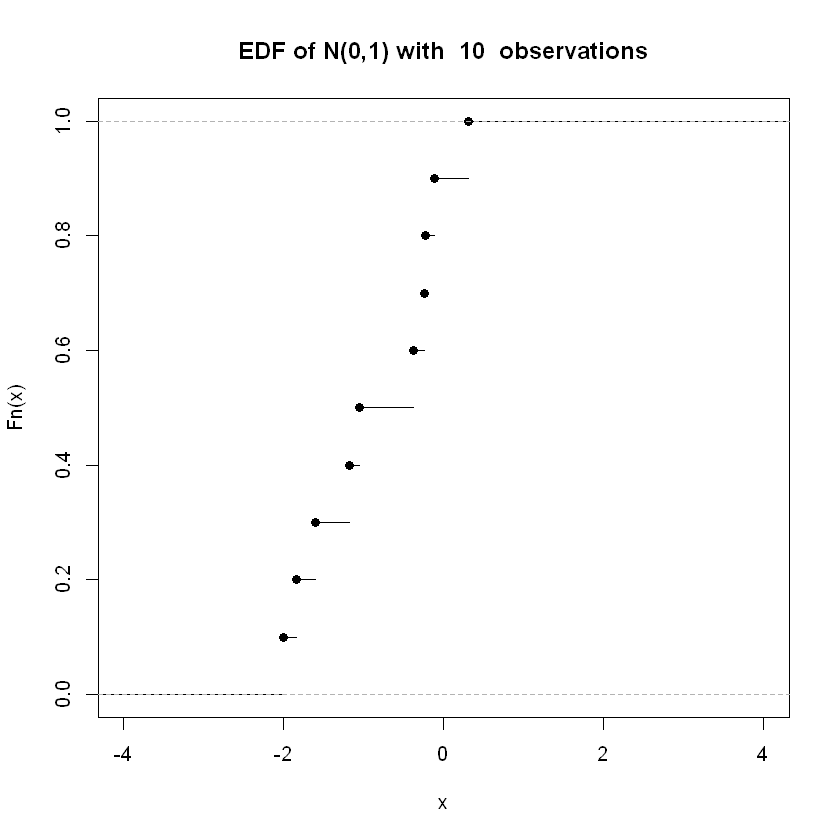

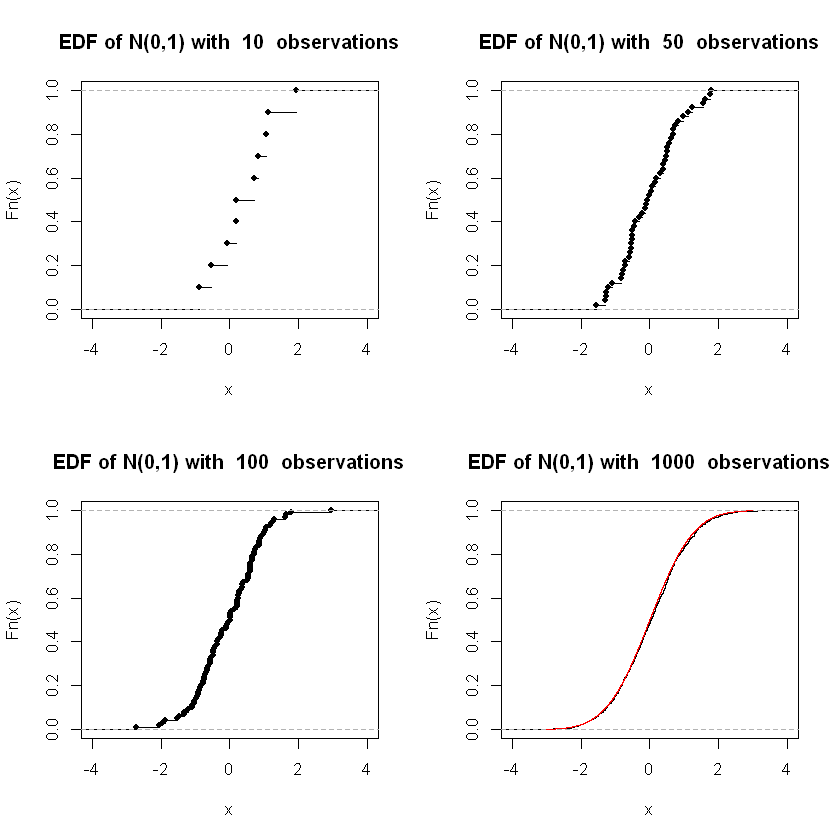

Warning message in file(file, "rt"):
"cannot open file '...//Data//DSP500.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


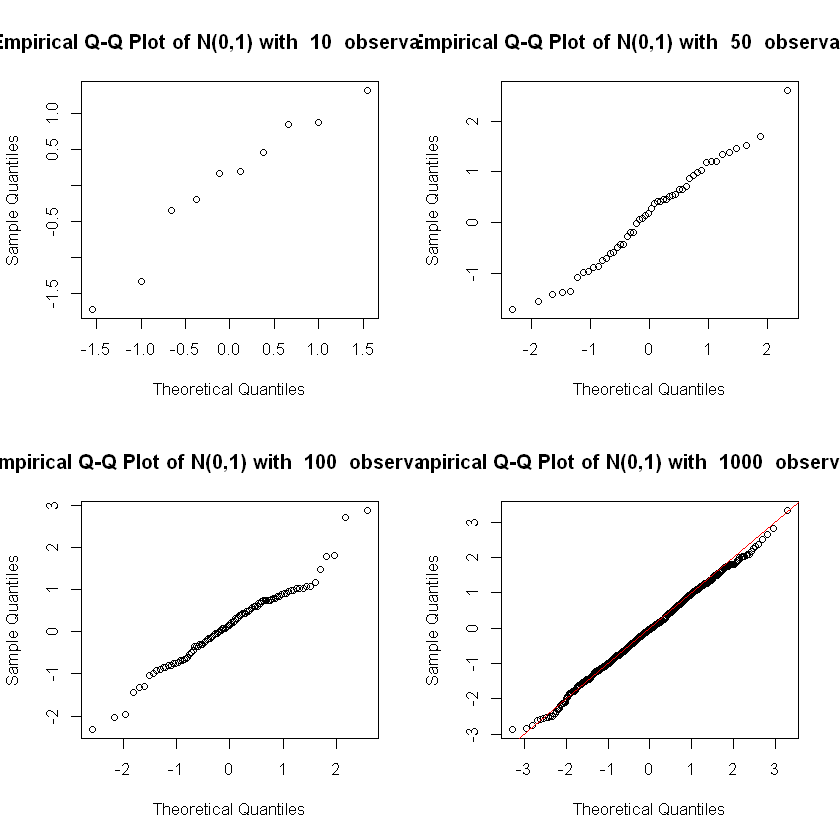

In [3]:
rm(list = ls())
setwd("...")  # set directory

# QQ plots
q<-c(.01,.025,.05,.1,.15,.25,.5,0.75,0.85,0.9,0.95,0.975,0.99)
q_norm <- round(qnorm(q),3)
q_cauchy <- round(qcauchy(q),3)
q_exp <- round(qexp(q),3)
rbind(q,q_norm,q_cauchy,q_exp)

par(mfrow=c(1,2))
plot(q_norm,q_exp,main="Exp(1) Quantiles vs N(0,1) Quantiles")
plot(q_norm,q_cauchy,main="Cauchy(0,1) Quantiles vs N(0,1) Quantiles")

q <- seq(0.001,0.999,by=0.001)
q_norm1 <- qnorm(q)
q_norm2 <- qnorm(q,3,6)
q_cauchy <- round(qcauchy(q),3)
q_exp <- round(qexp(q),3)

par(mfrow=c(1,2))
plot(q_norm1,q_exp,main="QQ: Exp(1) vs N(0,1)",xlab="",ylab="")
plot(q_norm1,q_cauchy,main="QQ: Cauchy(0,1) vs N(0,1)",xlab="",ylab="")



# Heavy tail
par(mfrow=c(1,1))

x<-seq(3,6,by=0.01)
y_n <- dnorm(x)
y_c <- dcauchy(x)

plot(x,y_c,ylim=c(0,0.031), type="l", main="Right Tails of N(0,1) and Cauchy(0,1)", ylab="Densities",lty=1,lwd=2)
lines(x,y_n,lty=4,col="red",lwd=2)

legend("topright", c("N(0,1)","Cauchy(0,1)"), text.col=c("red","black"), lty = c(4,1),lwd=c(2,2), col=c("red","black"))

q<-seq(0.998,0.9999,by=0.00001)
Q_normal <- qnorm(q)
Q_Cauchy <- tan((q-0.5)*pi)

par(mfrow=c(1,1))
plot(q,Q_normal,type="l",lty=4,lwd=2,col="red", main="N(0,1) Quantiles")

plot(q,Q_Cauchy,type="l",lty=1,lwd=2,col="black",main="Cauchy(0,1) Quantiles")

plot(Q_normal, Q_Cauchy,main="Q-Q Plot of Right Tails of N(0,1) & C(0,1)")


par(mfrow=c(1,1))
plot(q_exp,q_cauchy,main="QQ: Cauchy(0,1) vs Exp(1)",xlab="",ylab="")


plot(q_norm1,q_norm2,main="QQ: N(3,36) vs N(0,1)",xlab="",ylab="")
abline(3,6,col="red") # draw a straight line


# edf 
N <- c(10, 50, 100, 1000)

par(mfrow=c(1,1))
X <- rnorm(N[1])
sort(X)
edf_normal <- ecdf(X)
plot(edf_normal, xlim=c(-4,4), main = paste("EDF of N(0,1) with ", bquote(.(N[1])), " observations"))

par(mfrow=c(2,2))
for (i in 1:4)
{
  X <- rnorm(N[i])
  edf_normal <- ecdf(X)
  plot(edf_normal, xlim=c(-4,4), main = paste("EDF of N(0,1) with ", bquote(.(N[i])), " observations"))
}

x<-seq(-3,3,by=0.001)
y<-pnorm(x)
lines(x,y,col="red")


# empirical QQ
N <- c(10, 50, 100, 1000)

par(mfrow=c(2,2))
for (i in 1:4)
{
  X <- rnorm(N[i])
  qqnorm(X,  main = paste("Empirical Q-Q Plot of N(0,1) with ", bquote(.(N[i])), " observations"))
}
abline(0,1,col="red")


# empirical QQ for DSPLR
SP500 <- read.table("...//Data//DSP500.csv",header = T, sep=",")

attach(SP500)
DSP<-rev(SP500$Close) 
DSPLR <- diff(log(DSP))  # compute log returns; 
                         # try help(diff) for the usage of diff

n <- length(DSPLR)
q <- seq(1/(n+1),n/(n+1),by=1/n)
q_cauchy <- qcauchy(q)

q_norm <- qnorm(q)

par(mfrow = c(1,2))

#qqnorm(DSPLR)
qqplot(q_norm, DSPLR,main="Empirical Quantiles of DSPLR vs N(0,1)",xlab="N(0,1) quantitles", ylab="DSPLR quantiles")

qqplot(q_cauchy, DSPLR, main="Empirical Quantiles of DSPLR vs Cauchy(0,1)",xlab="Cauchy(0,1) quantitles", ylab="DSPLR quantiles")

# Compute VaR under different distribution assumptions
# based on empirical distribution
q <- 0.01 
VaR_emp <- -quantile(DSPLR,q)

# if based on normal
mu_DSPLR <- mean(DSPLR)
sd_DSPLR <- sd(DSPLR)

VaR_normal <- - qnorm(q,mu_DSPLR, sd_DSPLR)
VaR_normal 

# if based on Cauchy
m_DSPLR <- median(DSPLR)
lam_DSPLR <- 1/2 * (quantile(DSPLR,3/4) - quantile(DSPLR,1/4))
c(m_DSPLR, lam_DSPLR)

# Or: MLE fitting
library("MASS") 
fitdistr(DSPLR,"cauchy") 

VaR_cauchy <- - qcauchy(q,m_DSPLR, lam_DSPLR)
VaR_cauchy

c(VaR_normal, VaR_cauchy)


# empirical VaR vs VaR_normal
q<-0.01
VaR_normal <- - qnorm(q,mu_DSPLR, sd_DSPLR)
VaR_emp <- -quantile(DSPLR,q)
c(VaR_normal, VaR_emp)

q <- seq(0.001,0.01,by=0.0002)
q_DSPLR <- quantile(DSPLR,q)
q_norm <- qnorm(q,mu_DSPLR,sd_DSPLR)

par(mfrow=c(1,2))

plot(q,q_DSPLR,ylim=c(-0.07,-0.02),main="Left Tails: DSPLR & Normal",xlab="q",ylab="Quantiles",pch=19)
points(q,q_norm,col="red",pch=23)
legend("bottomright", pch=c(19,23),c("DSPLR","Fitted Normal"), text.col=c("black","red"))

par(mfrow=c(1,2))
plot(q,-q_DSPLR,ylim=c(0.02,0.07),main="VaR based on normal and empirical VaR",xlab="q",ylab="",pch=19)
points(q,-q_norm,col="red",pch=23)
legend("topright", pch=c(19,23),c("DSPLR","Fitted Normal"), text.col=c("black","red"))
plot(q,q_norm/q_DSPLR, main="Ratios between VaR based on normal and empirical VaR ",ylab="Ratios")




# expected shortall
q<-0.01
VaR_emp <- - quantile(DSPLR,q)
ES_emp <- mean(- DSPLR[- DSPLR > VaR_emp])

# to understand the usage of [ ], try
A<-c(1,2,3)
B<-A[A<=2]
B


mu_DSPLR <- mean(DSPLR)
sd_DSPLR <- sd(DSPLR)
VaR_normal <-  - qnorm(q,mu_DSPLR, sd_DSPLR)

N<-100000
X<-rnorm(N,mu_DSPLR,sd_DSPLR)
ES_normal <- mean( - X[- X > VaR_normal])

c(ES_emp, ES_normal)


q<-0.001

VaR_normal <- - qnorm(q,mu_DSPLR, sd_DSPLR)
VaR_emp <- - quantile(DSPLR,q)
ES_emp <- mean(- DSPLR[- DSPLR > VaR_emp])

N<-1000000
X<-rnorm(N,mu_DSPLR,sd_DSPLR)
ES_normal <- mean(- X[- X > VaR_normal])

c(ES_emp, ES_normal)
